In [143]:
# 1. Data Exploration and Preprocessing
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

In [73]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [75]:
df.info() #gives info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [76]:
df.shape # this gives the size of the dataset

(20000, 17)

In [77]:
df.dtypes  # this gives the type of the features present in the dataset.

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [78]:
df.describe() # gives the sumary statistics of the features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [79]:
df[df.duplicated()] # to check duplicated rows

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
627,I,3,7,4,5,2,7,7,0,7,13,6,8,0,8,1,7
724,L,3,6,3,4,1,1,0,6,6,0,1,5,0,8,0,8
730,I,1,9,0,6,0,7,7,4,4,7,6,8,0,8,0,8
910,X,5,11,6,8,2,7,7,5,4,7,6,8,3,8,4,8
943,O,2,3,2,1,1,8,7,6,4,9,6,8,2,8,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,T,4,5,4,4,2,6,11,2,7,11,9,4,1,11,2,4
19950,O,4,5,5,4,3,7,7,8,5,7,6,8,2,8,3,8
19975,E,1,0,1,0,0,5,8,5,7,7,6,12,0,8,6,10
19987,L,3,7,3,5,1,0,1,6,6,0,0,6,0,8,0,8


In [80]:
df.columns[df.columns.duplicated()] # to check duplicated coluns

Index([], dtype='object')

In [84]:
df = df.drop_duplicates().reset_index(drop=True) # droping the duplicated rows
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [89]:
df.isnull().sum() # checks for missing or null values

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [91]:
df['letter'].value_counts()

letter
P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: count, dtype: int64

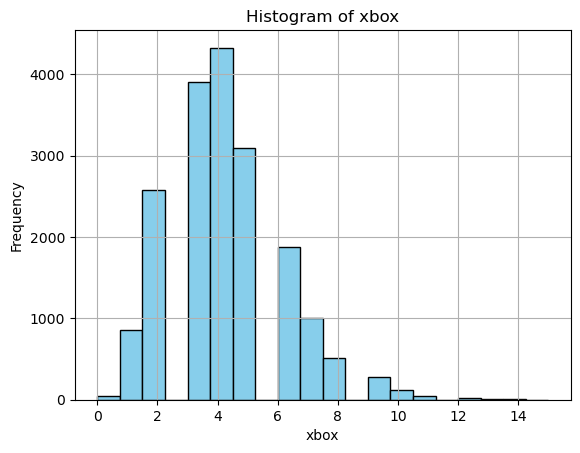

Skewness: 0.76
negatively skewed


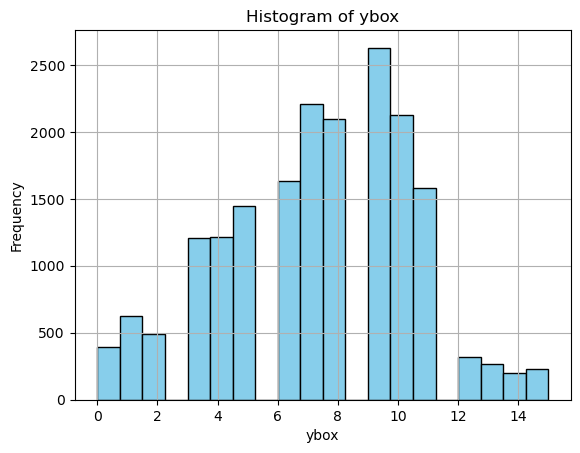

Skewness: -0.21
negatively skewed


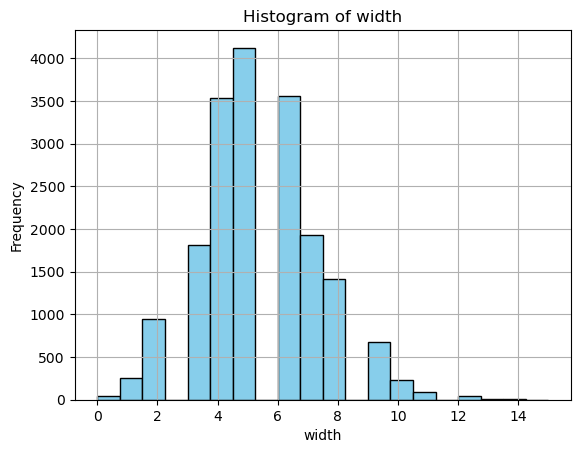

Skewness: 0.34
negatively skewed


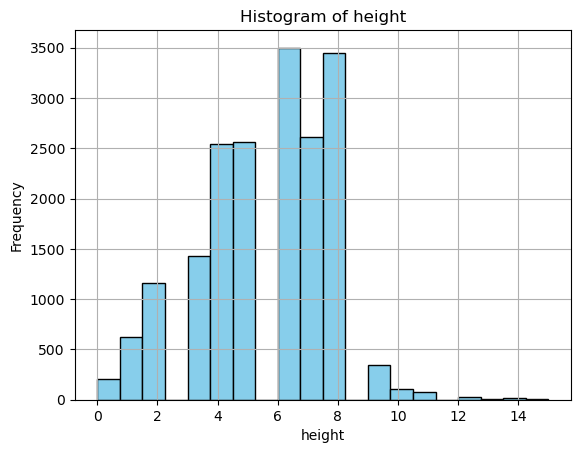

Skewness: -0.25
negatively skewed


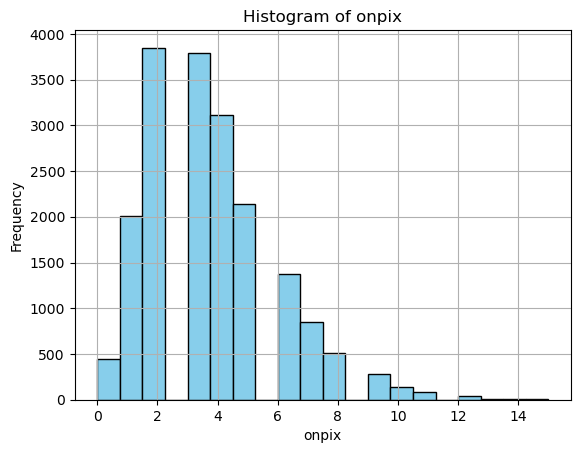

Skewness: 0.96
negatively skewed


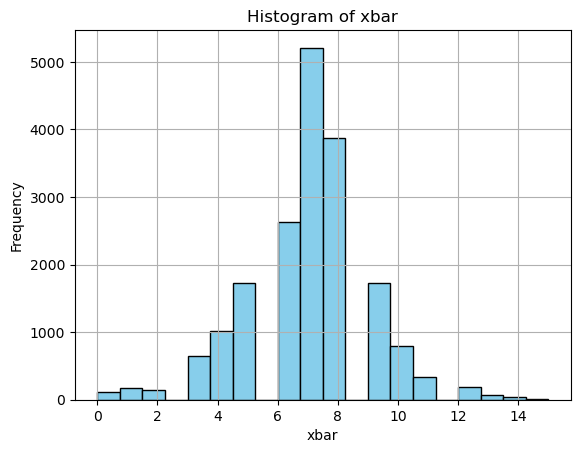

Skewness: -0.26
negatively skewed


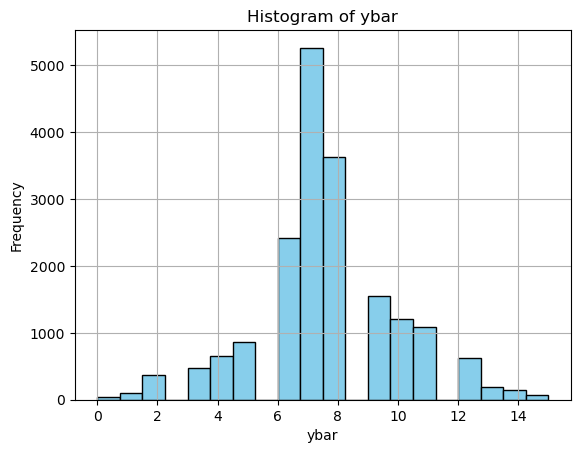

Skewness: 0.10
negatively skewed


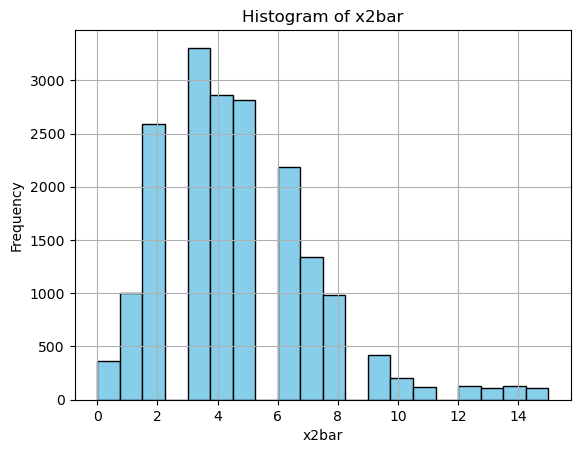

Skewness: 1.12
positively skewed


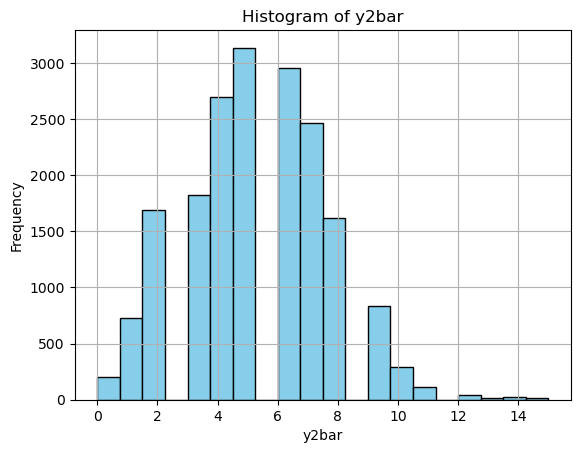

Skewness: 0.20
negatively skewed


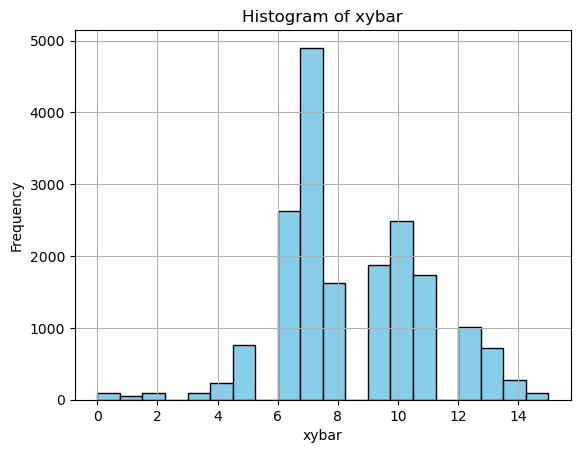

Skewness: 0.13
negatively skewed


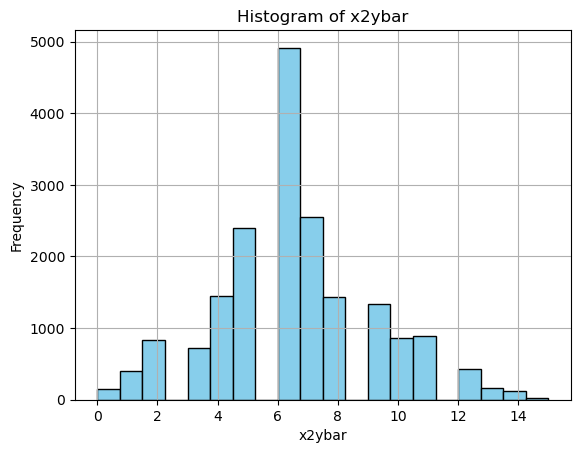

Skewness: 0.28
negatively skewed


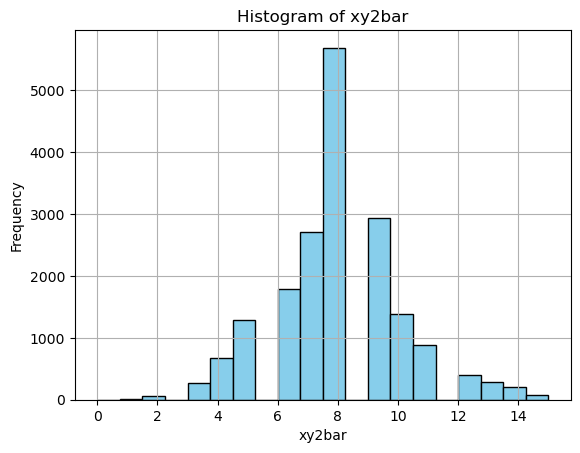

Skewness: 0.25
negatively skewed


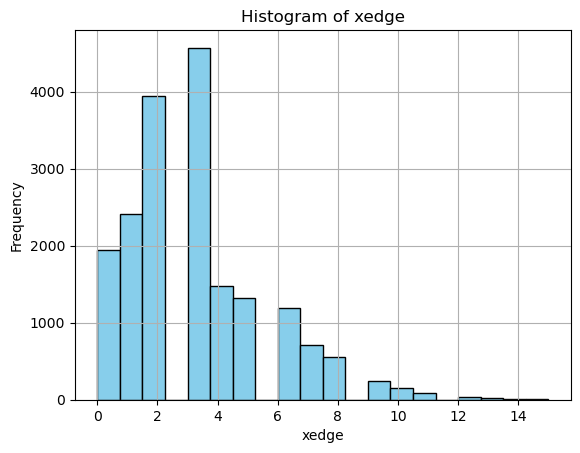

Skewness: 1.07
positively skewed


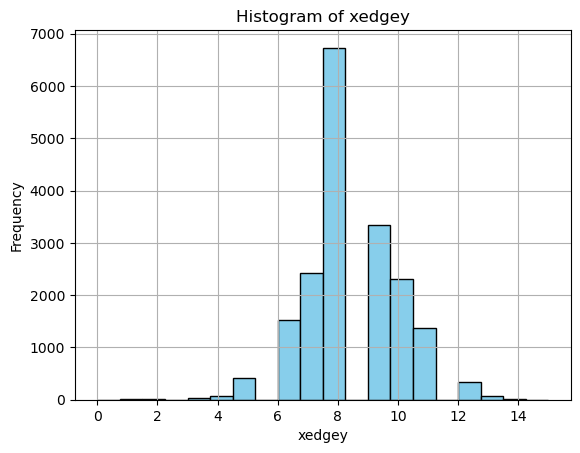

Skewness: 0.02
negatively skewed


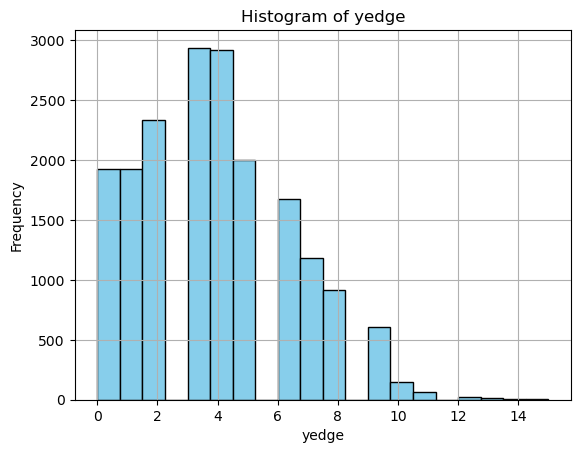

Skewness: 0.46
negatively skewed


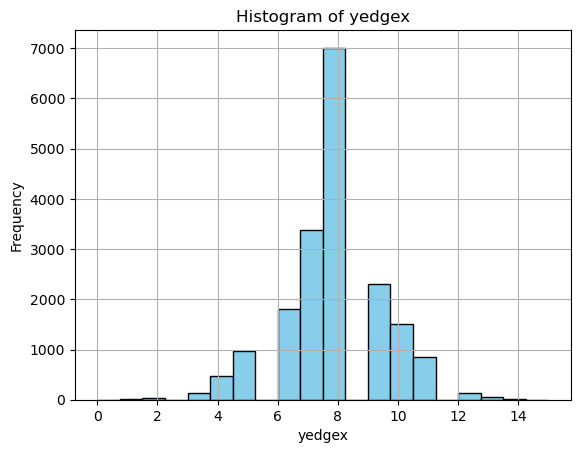

Skewness: -0.18
negatively skewed


In [93]:
# visualizations histograms
num_col=df.select_dtypes(include=["number"]).columns
for col in num_col:
    col_skewness = skew(df[col]) #calculating skewness of each histogram
    
    df[col].hist(bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {col_skewness:.2f}") # printing skewness
    # deterining the skewness(=ve or -ve)
    if col_skewness > 1:
        print("positively skewed")
    else:
        print("negatively skewed")

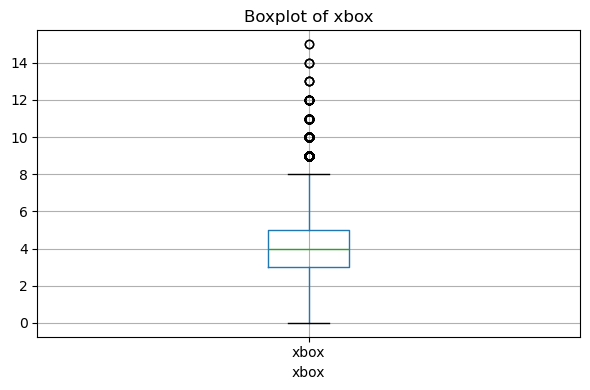

Outliers detected: 482
Lower extreme: 0.0
Upper extreme: 8.0


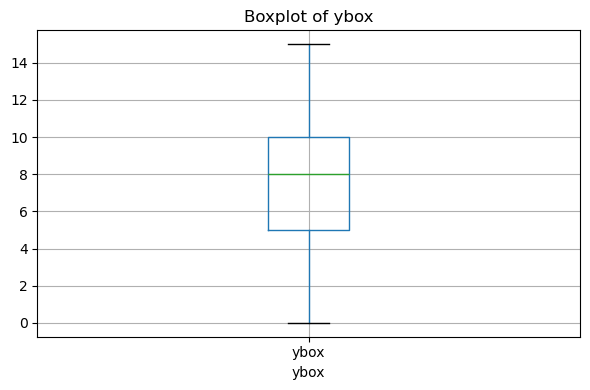

Outliers detected: 0
Lower extreme: -2.5
Upper extreme: 17.5


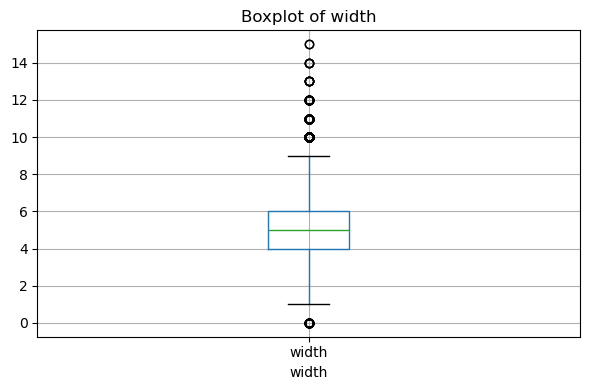

Outliers detected: 427
Lower extreme: 1.0
Upper extreme: 9.0


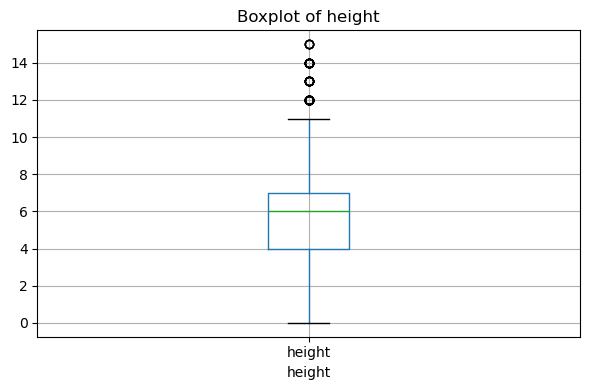

Outliers detected: 60
Lower extreme: -0.5
Upper extreme: 11.5


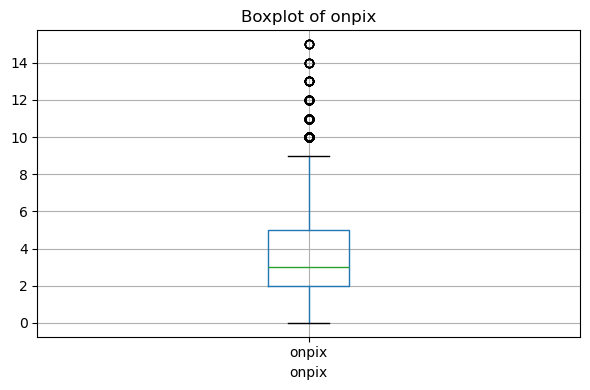

Outliers detected: 292
Lower extreme: -2.5
Upper extreme: 9.5


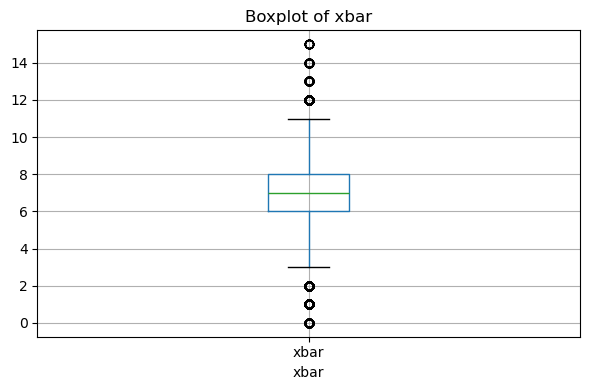

Outliers detected: 733
Lower extreme: 3.0
Upper extreme: 11.0


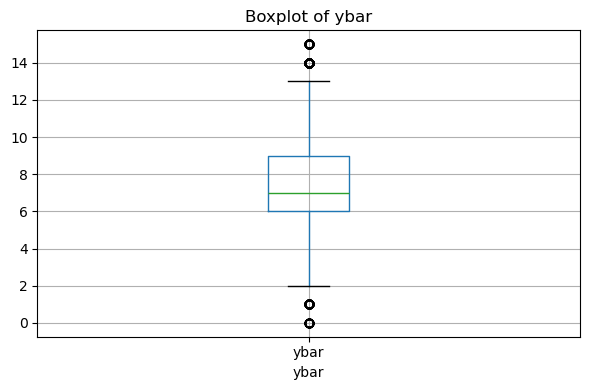

Outliers detected: 341
Lower extreme: 1.5
Upper extreme: 13.5


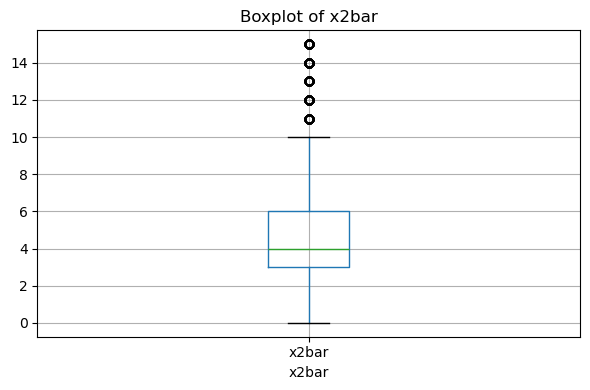

Outliers detected: 596
Lower extreme: -1.5
Upper extreme: 10.5


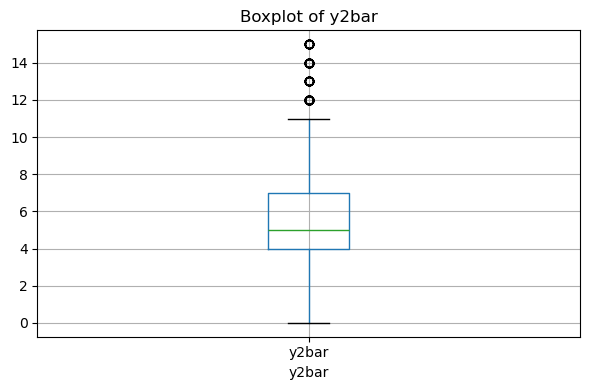

Outliers detected: 104
Lower extreme: -0.5
Upper extreme: 11.5


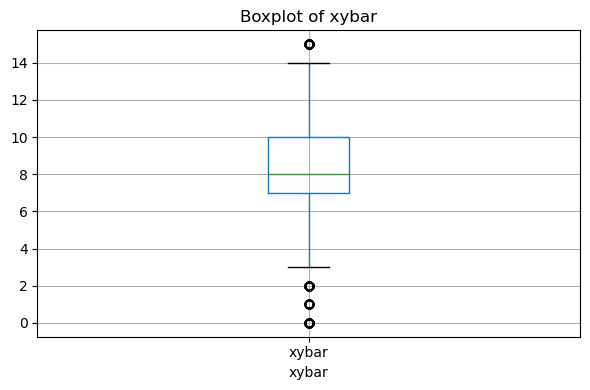

Outliers detected: 331
Lower extreme: 2.5
Upper extreme: 14.5


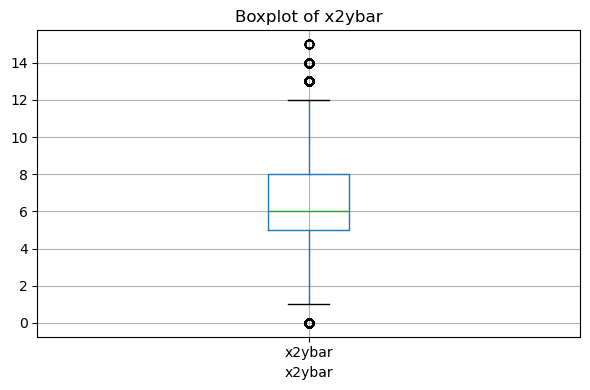

Outliers detected: 458
Lower extreme: 0.5
Upper extreme: 12.5


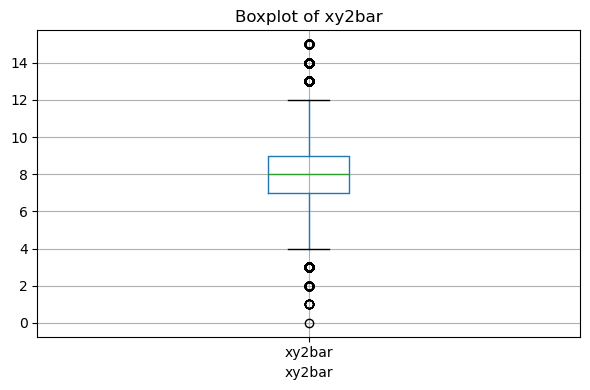

Outliers detected: 914
Lower extreme: 4.0
Upper extreme: 12.0


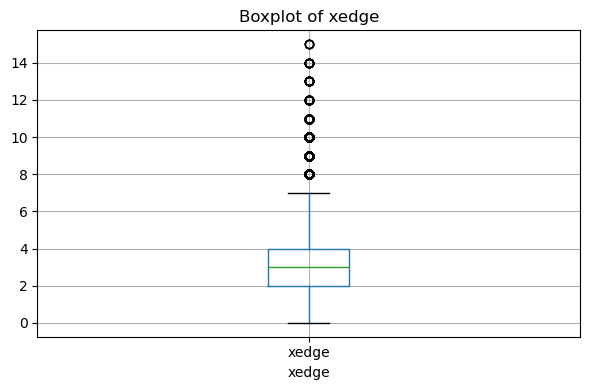

Outliers detected: 1089
Lower extreme: -1.0
Upper extreme: 7.0


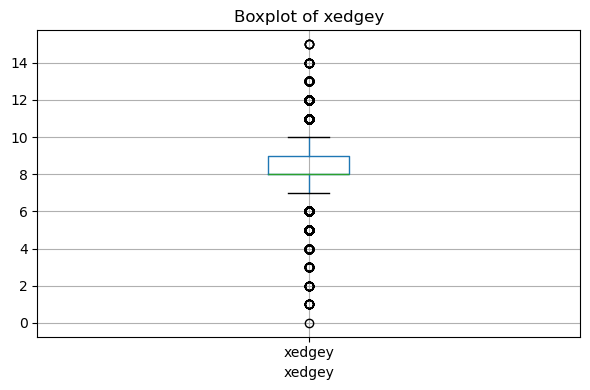

Outliers detected: 3881
Lower extreme: 6.5
Upper extreme: 10.5


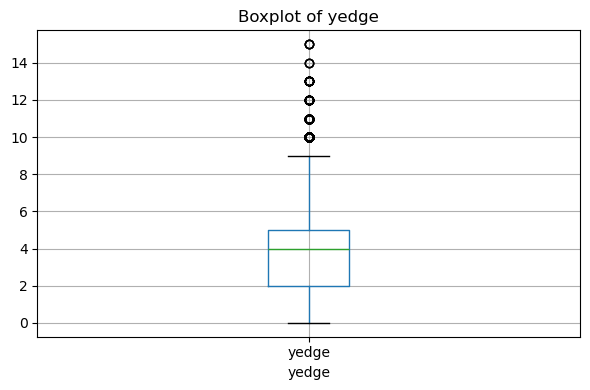

Outliers detected: 258
Lower extreme: -2.5
Upper extreme: 9.5


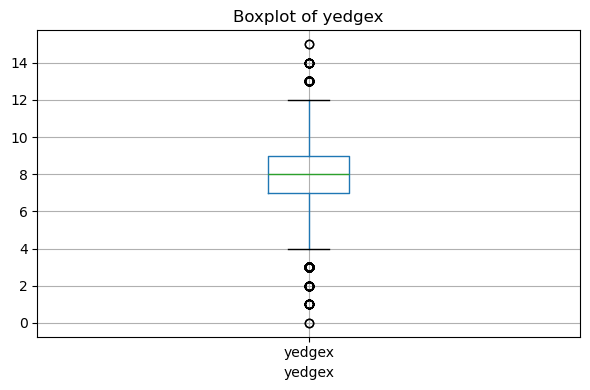

Outliers detected: 243
Lower extreme: 4.0
Upper extreme: 12.0


In [94]:
# boxplots
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [95]:
# Encode categorical variables 
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18663,19,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
18664,3,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
18665,2,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
18666,19,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


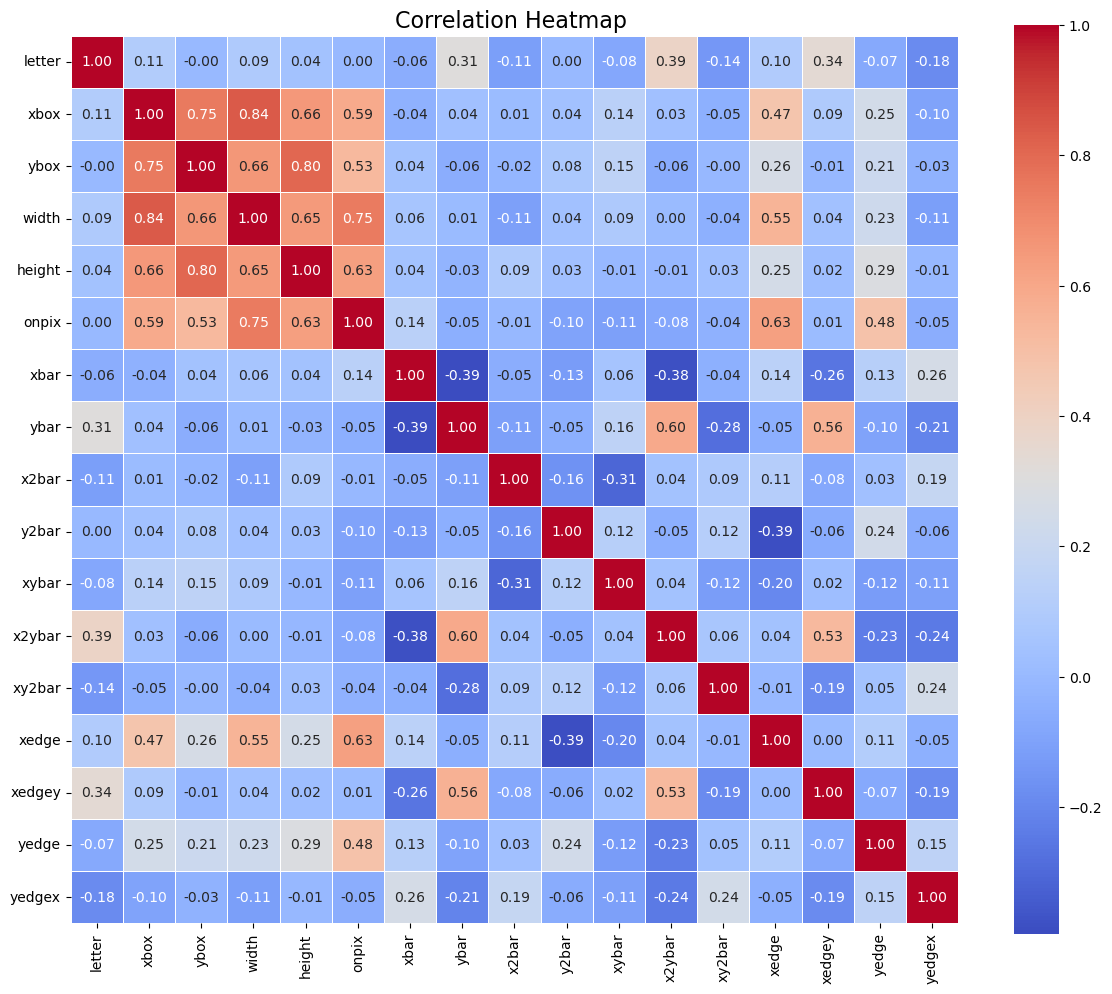

In [96]:
 #generating correlation heat maps to explore relationships between pairs of variables.
# Computing the correlation matrix
corr_matrix = df.corr()

# Setting  the matplotlib figure
plt.figure(figsize=(12, 10))

# plotting the heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)

plt.title("Correlation Heatmap ", fontsize=16)
plt.tight_layout()
plt.show()

In [97]:
# handling outliers
# IQR method to cap outliers 
for col in num_col:
    
    Q1 = df.loc[:,col].quantile(0.25)
    Q3 = df.loc[:,col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values above upper_bound
    df.loc[df.loc[:,col] > upper_bound, col] = upper_bound

    # Cap values below lower_bound
    df.loc[df.loc[:,col] < lower_bound, col] = lower_bound
    
    

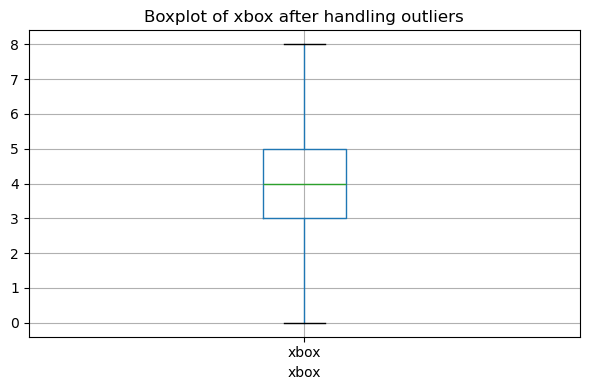

Outliers detected: 0
Lower extreme: 0.0
Upper extreme: 8.0


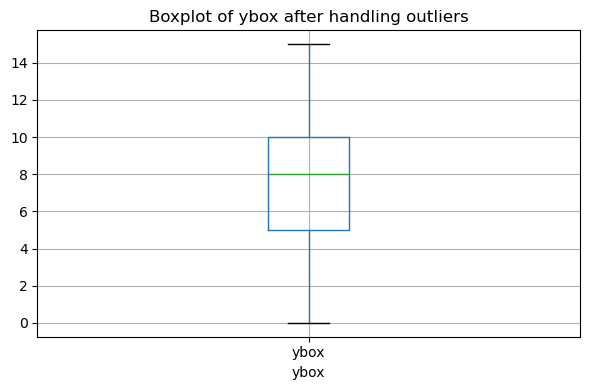

Outliers detected: 0
Lower extreme: -2.5
Upper extreme: 17.5


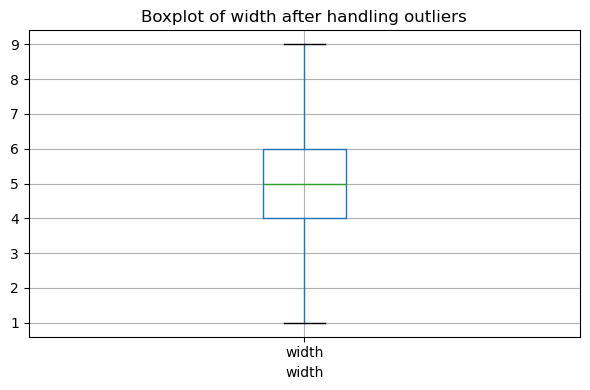

Outliers detected: 0
Lower extreme: 1.0
Upper extreme: 9.0


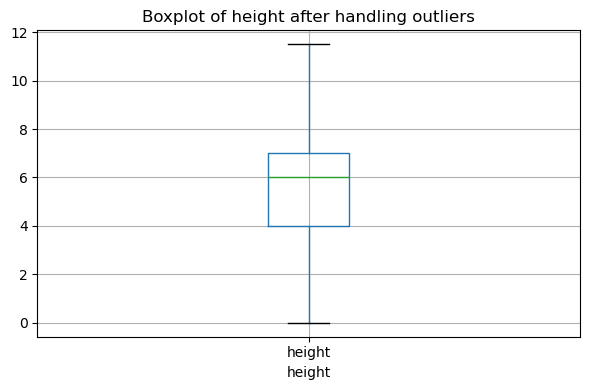

Outliers detected: 0
Lower extreme: -0.5
Upper extreme: 11.5


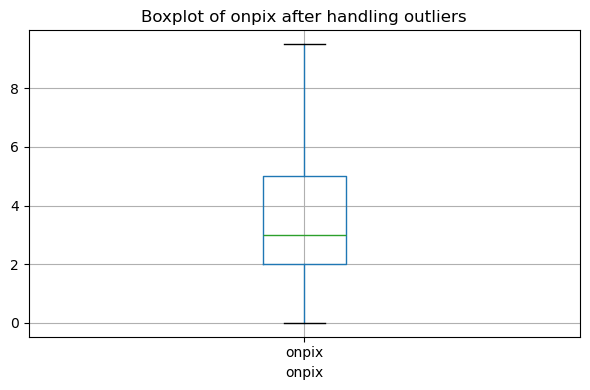

Outliers detected: 0
Lower extreme: -2.5
Upper extreme: 9.5


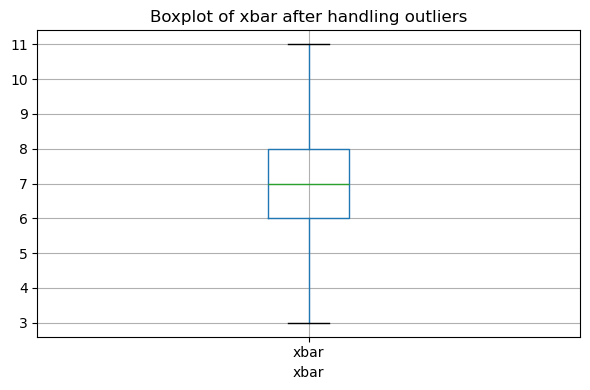

Outliers detected: 0
Lower extreme: 3.0
Upper extreme: 11.0


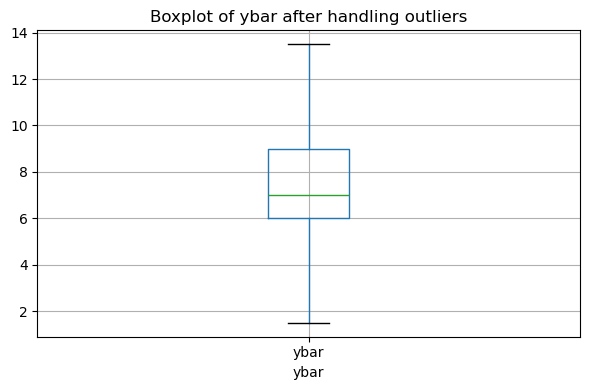

Outliers detected: 0
Lower extreme: 1.5
Upper extreme: 13.5


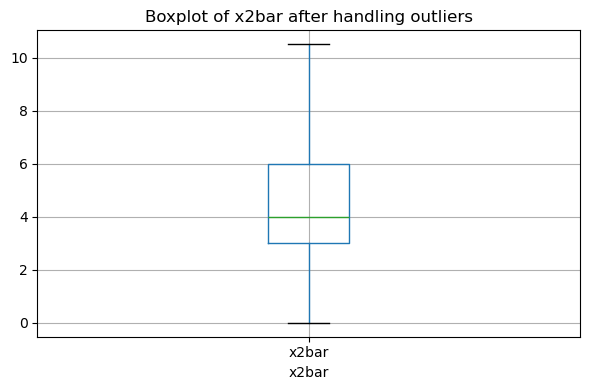

Outliers detected: 0
Lower extreme: -1.5
Upper extreme: 10.5


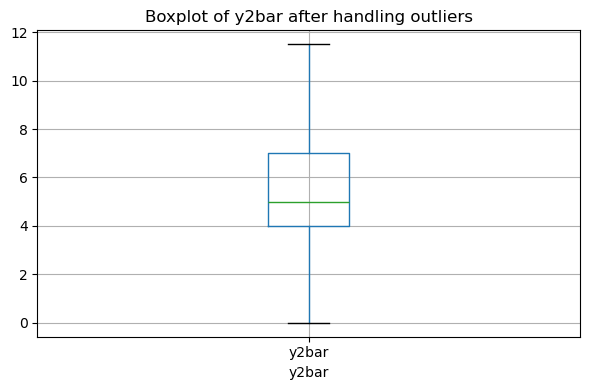

Outliers detected: 0
Lower extreme: -0.5
Upper extreme: 11.5


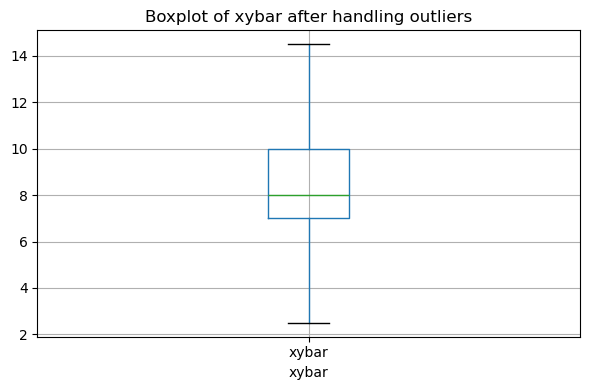

Outliers detected: 0
Lower extreme: 2.5
Upper extreme: 14.5


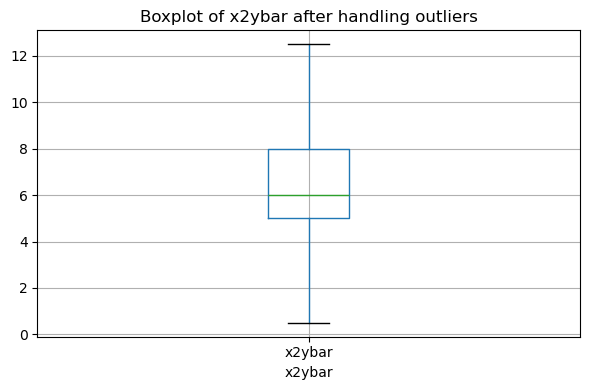

Outliers detected: 0
Lower extreme: 0.5
Upper extreme: 12.5


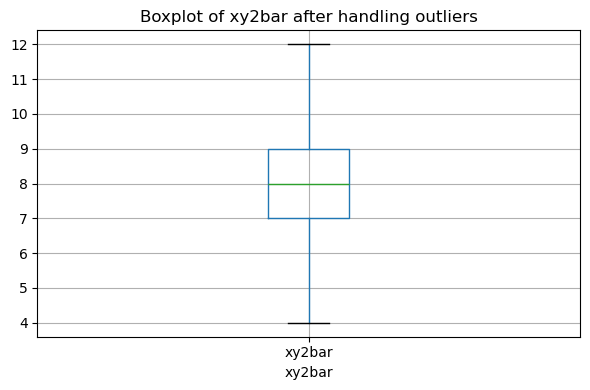

Outliers detected: 0
Lower extreme: 4.0
Upper extreme: 12.0


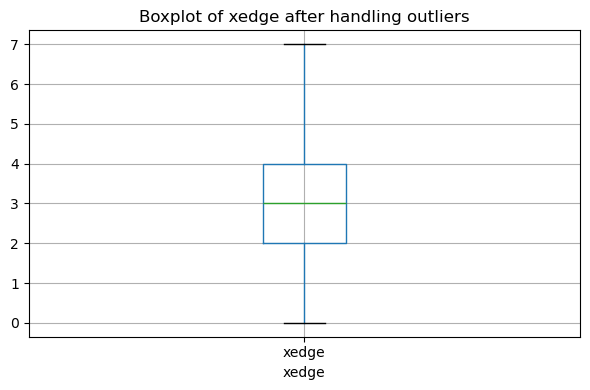

Outliers detected: 0
Lower extreme: -1.0
Upper extreme: 7.0


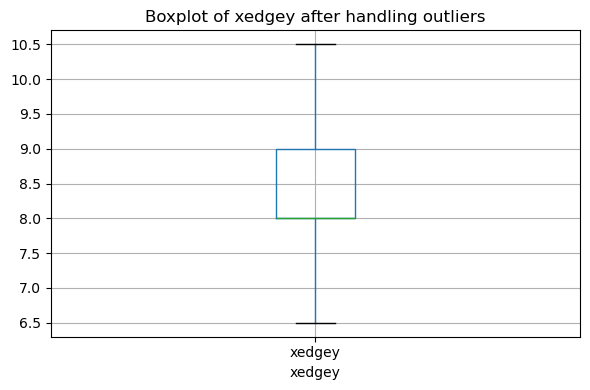

Outliers detected: 0
Lower extreme: 6.5
Upper extreme: 10.5


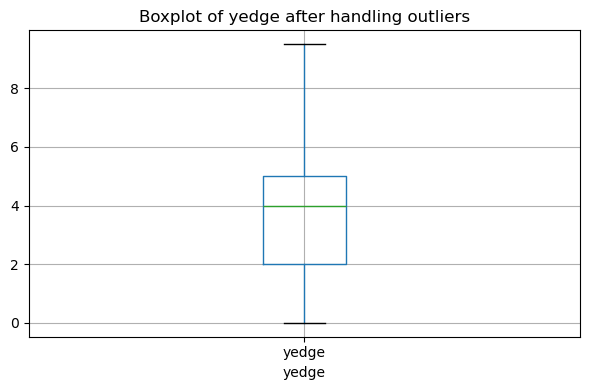

Outliers detected: 0
Lower extreme: -2.5
Upper extreme: 9.5


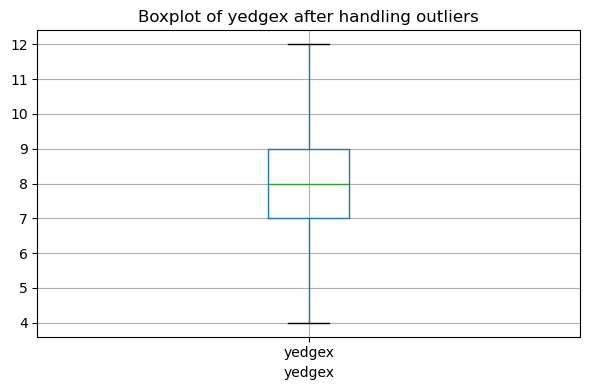

Outliers detected: 0
Lower extreme: 4.0
Upper extreme: 12.0


In [98]:
# boxplots after handling outliers
for col in num_col:
    series = df[col]
  # finding outliers by iqr
    Q1 = series.quantile(0.25) # determining q1
    Q3 = series.quantile(0.75)  # determining q3
    IQR = Q3 - Q1
    lower_extreme = Q1 - 1.5 * IQR  #deterining lower extreme
    upper_extreme = Q3 + 1.5 * IQR   #deterining upper extreme
    outliers = series[(series < lower_extreme) | (series > upper_extreme)] # determining outliers

    plt.figure(figsize=(6, 4))
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col} after handling outliers")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    print(f"Outliers detected: {len(outliers)}") #printing no of outliers
    print(f"Lower extreme: {lower_extreme}")
    print(f"Upper extreme: {upper_extreme}")

In [99]:
# Separate features and target variable
x = df.drop(columns=['letter'])
y = df['letter']

In [100]:
# standardization
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [101]:
# Splitting the data in to train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=100)

In [105]:
#2. Model Implementation
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [108]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [115]:
# Train the model
nn = model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2629 - loss: 2.5942 - val_accuracy: 0.6495 - val_loss: 1.2276
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6758 - loss: 1.1062 - val_accuracy: 0.7241 - val_loss: 0.9107
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7481 - loss: 0.8389 - val_accuracy: 0.7663 - val_loss: 0.7647
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7873 - loss: 0.7044 - val_accuracy: 0.7998 - val_loss: 0.6666
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8115 - loss: 0.6273 - val_accuracy: 0.8149 - val_loss: 0.6129
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8496 - loss: 0.5229 - val_accuracy: 0.8333 - val_loss: 0.5518
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8551 - loss: 0.4949 - val_accuracy: 0.8410 - val_loss: 0.5132
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8669 - loss: 0.4465 - val_accuracy: 0.

In [123]:
# hyper parameter tuning
from kerastuner import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [125]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')
tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 04m 03s]
val_accuracy: 0.9086039662361145

Best val_accuracy So Far: 0.9449838201204935
Total elapsed time: 00h 23m 18s


In [127]:
# Getting the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 112, Best units2: 48, Best learning_rate: 0.001


In [129]:
# Build the best model with optimal hyperparameters
fmodel = tuner.hypermodel.build(best_hps)

In [131]:
# Training the model
fmodel.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3512 - loss: 2.3989 - val_accuracy: 0.6930 - val_loss: 1.0324
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7400 - loss: 0.9089 - val_accuracy: 0.7794 - val_loss: 0.7497
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8053 - loss: 0.6697 - val_accuracy: 0.8202 - val_loss: 0.6198
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8411 - loss: 0.5591 - val_accuracy: 0.8463 - val_loss: 0.5412
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8611 - loss: 0.4772 - val_accuracy: 0.8564 - val_loss: 0.4867
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8750 - loss: 0.4198 - val_accuracy: 0.8721 - val_loss: 0.4333
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8916 - loss: 0.3624 - val_accuracy: 0.8899 - val_loss: 0.3819
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9028 - loss: 0.3259 - val_accuracy: 0.

In [147]:
# 4. Evaluation
# Evaluate model on test set
# Predicting classes
y_pred_probs = fmodel.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)     # predicted labels
y_true = y_test                               # true labels (already integers)
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.94      0.92      0.93       130
           2       0.92      0.91      0.91       156
           3       0.91      0.99      0.95       148
           4       0.94      0.90      0.92       138
           5       0.97      0.88      0.92       160
           6       0.91      0.90      0.90       125
           7       0.92      0.92      0.92       154
           8       0.92      0.92      0.92        97
           9       0.94      0.96      0.95       138
          10       0.95      0.94      0.94       148
          11       0.91      0.96      0.94       129
          12       0.98      0.92      0.95       154
          13       0.90      0.96      0.93       136
          14       0.96      0.93      0.95       168
          15       0.90      0.96      0.93       148
          16    

In [ ]:
# Hyperparameter tuning significantly enhanced model generalization and balanced accuracy across all 26 classes.
# While the default model was strong, the tuned version showed better test accuracy, stability, and class-level fairness, proving the importance of fine-tuning.